In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import joblib

pd.set_option('display.max_columns', 200)
%matplotlib inline

print("Libraries loaded successfully")

Libraries loaded successfully


In [ ]:
df = pd.read_csv('house_price_data.csv')

print("Shape of dataset:", df.shape)
display(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumeric Summary:")
display(df.describe())


Shape of dataset: (8000, 25)


,property_id,neighborhood,distance_to_city_center,distance_to_metro,distance_to_school,crime_rate,house_age,total_area,bedrooms,bathrooms,floors,garage,garden,basement,balcony,construction_quality,renovation_status,heating_type,air_conditioning,parking_spaces,energy_efficiency,listing_duration,season_sold,year_sold,sale_price
0,PROP_000001,Forest Glen,6.6,908,296,1.0,22,103,3,3,1,1,1,1,0,Basic,Full,Gas,0,2,D,1,Winter,2022,342.8
1,PROP_000002,Lakeside,2.6,84,30,1.0,12,114,2,2,2,1,0,0,1,Standard,Never,Gas,1,0,A,17,Fall,2023,545.0
2,PROP_000003,Downtown,10.2,50,120,1.0,21,83,5,3,1,1,1,1,1,Premium,Never,Central,1,1,C,4,Summer,2021,710.1
3,PROP_000004,Riverside,5.1,475,48,1.0,0,127,3,1,2,1,1,1,1,Standard,Full,Central,1,1,D,55,Winter,2023,894.5
4,PROP_000005,Oakwood,0.5,647,111,1.0,21,59,6,2,2,0,0,0,0,Standard,Never,Central,0,0,C,15,Fall,2023,258.4



Missing values per column:
property_id                0
neighborhood               0
distance_to_city_center    0
distance_to_metro          0
distance_to_school         0
crime_rate                 0
house_age                  0
total_area                 0
bedrooms                   0
bathrooms                  0
floors                     0
garage                     0
garden                     0
basement                   0
balcony                    0
construction_quality       0
renovation_status          0
heating_type               0
air_conditioning           0
parking_spaces             0
energy_efficiency          0
listing_duration           0
season_sold                0
year_sold                  0
sale_price                 0
dtype: int64

Numeric Summary:


,distance_to_city_center,distance_to_metro,distance_to_school,crime_rate,house_age,total_area,bedrooms,bathrooms,floors,garage,garden,basement,balcony,air_conditioning,parking_spaces,listing_duration,year_sold,sale_price
count,8000.000000,8000.000000,8000.000000,8000.0,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000
mean,3.785213,337.536250,148.724875,1.0,14.295125,150.608125,3.359500,2.502875,1.808250,0.698000,0.598875,0.389625,0.504375,0.40050,1.400375,29.411625,2021.591625,725.181400
std,3.953137,350.469891,165.435271,0.0,14.677669,83.534599,1.129345,0.802074,0.600231,0.459154,0.490157,0.487696,0.500012,0.49003,0.922730,29.499529,1.065597,350.856932
min,0.500000,50.000000,30.000000,1.0,0.000000,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2020.000000,80.000000
25%,1.000000,94.750000,35.000000,1.0,4.000000,86.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,8.000000,2021.000000,416.375000
50%,2.500000,221.000000,90.000000,1.0,10.000000,134.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,20.000000,2022.000000,684.600000
75%,5.100000,455.000000,194.000000,1.0,20.000000,196.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000,42.000000,2022.000000,1108.375000
max,25.000000,3000.000000,1748.000000,1.0,100.000000,500.000000,6.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,200.000000,2023.000000,1200.000000


In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# Convert to numeric if possible
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Fill missing values
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode().iloc[0])

print("\nMissing after filling:")
print(df.isnull().sum())


Missing after filling:
property_id                0
neighborhood               0
distance_to_city_center    0
distance_to_metro          0
distance_to_school         0
crime_rate                 0
house_age                  0
total_area                 0
bedrooms                   0
bathrooms                  0
floors                     0
garage                     0
garden                     0
basement                   0
balcony                    0
construction_quality       0
renovation_status          0
heating_type               0
air_conditioning           0
parking_spaces             0
energy_efficiency          0
listing_duration           0
season_sold                0
year_sold                  0
sale_price                 0
dtype: int64


In [ ]:
possible_targets = ['SalePrice','sale_price','Price','price','saleprice']
target = None
for t in possible_targets:
    if t in df.columns:
        target = t
        break
if target is None:
    raise ValueError("Target column not found!")

print(f"Detected target column: {target}")

Detected target column: sale_price


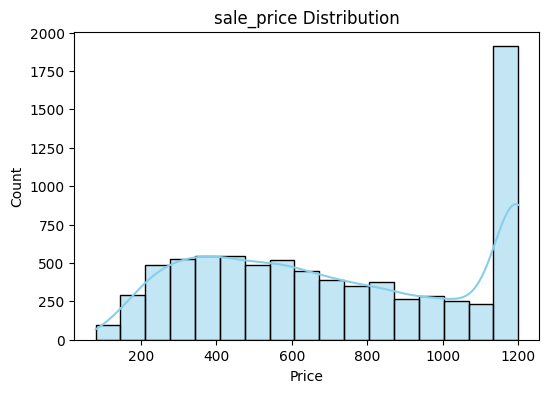

/tmp/ipython-input-1227757347.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


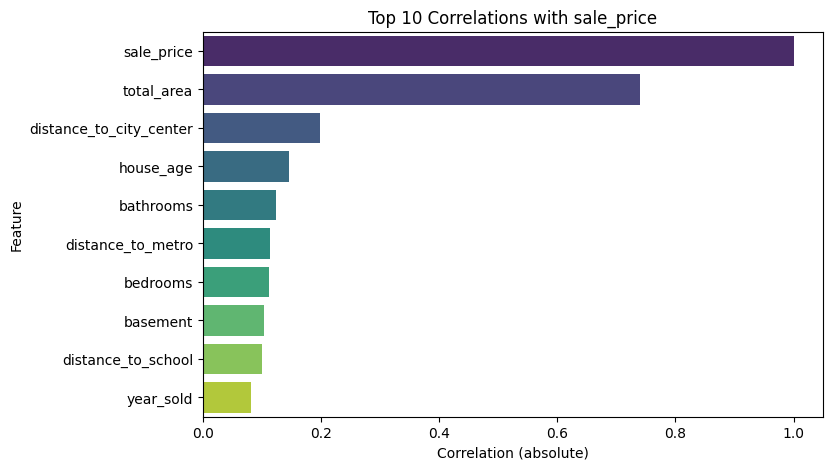

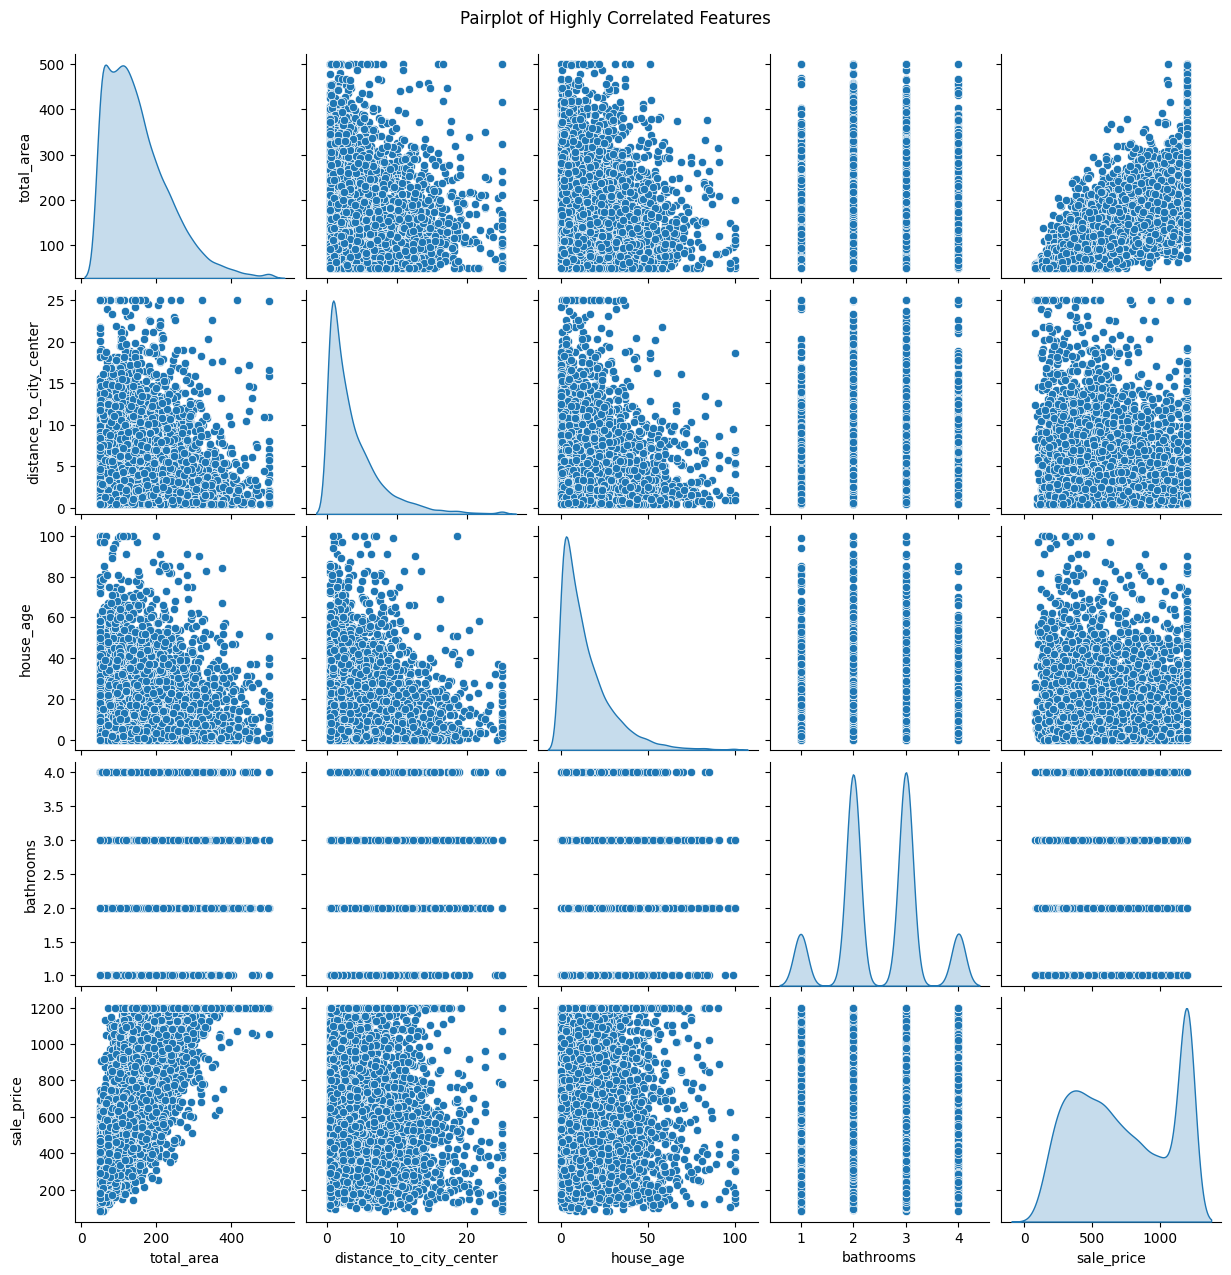

/tmp/ipython-input-1227757347.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set2')


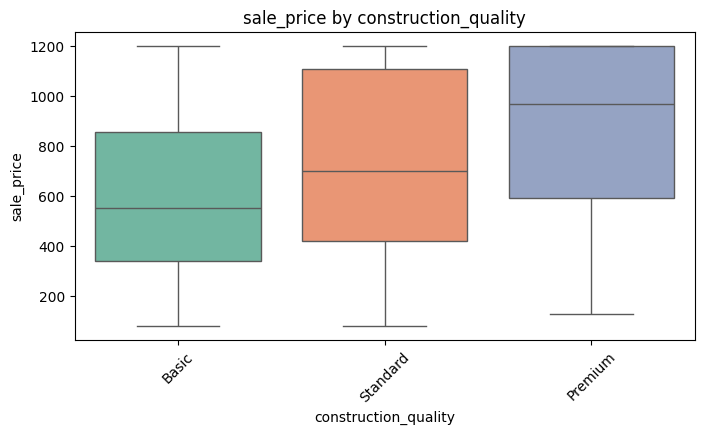

/tmp/ipython-input-1227757347.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set2')


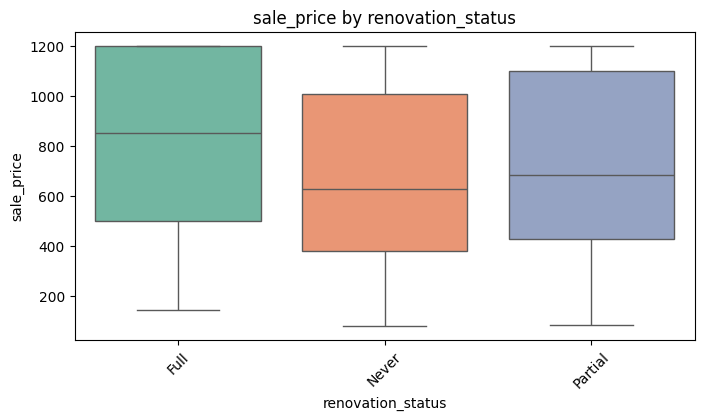

/tmp/ipython-input-1227757347.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set2')


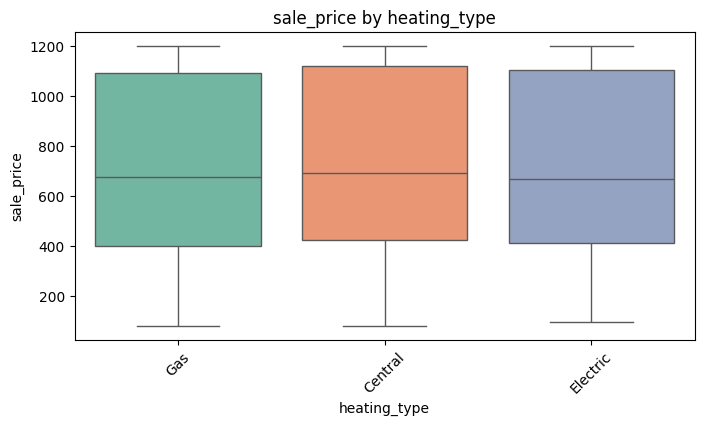

/tmp/ipython-input-1227757347.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set2')


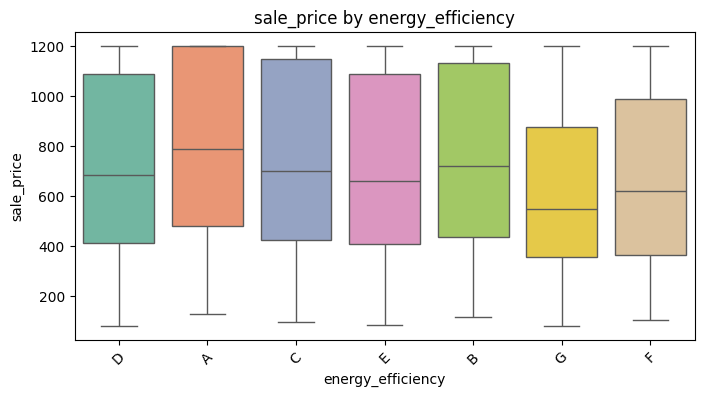

/tmp/ipython-input-1227757347.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette='Set2')


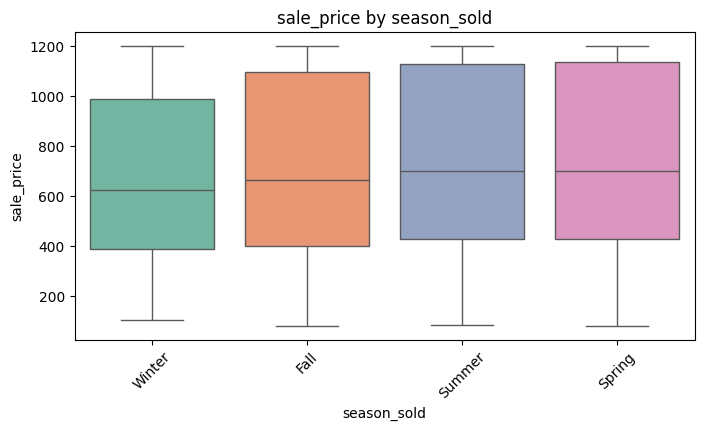

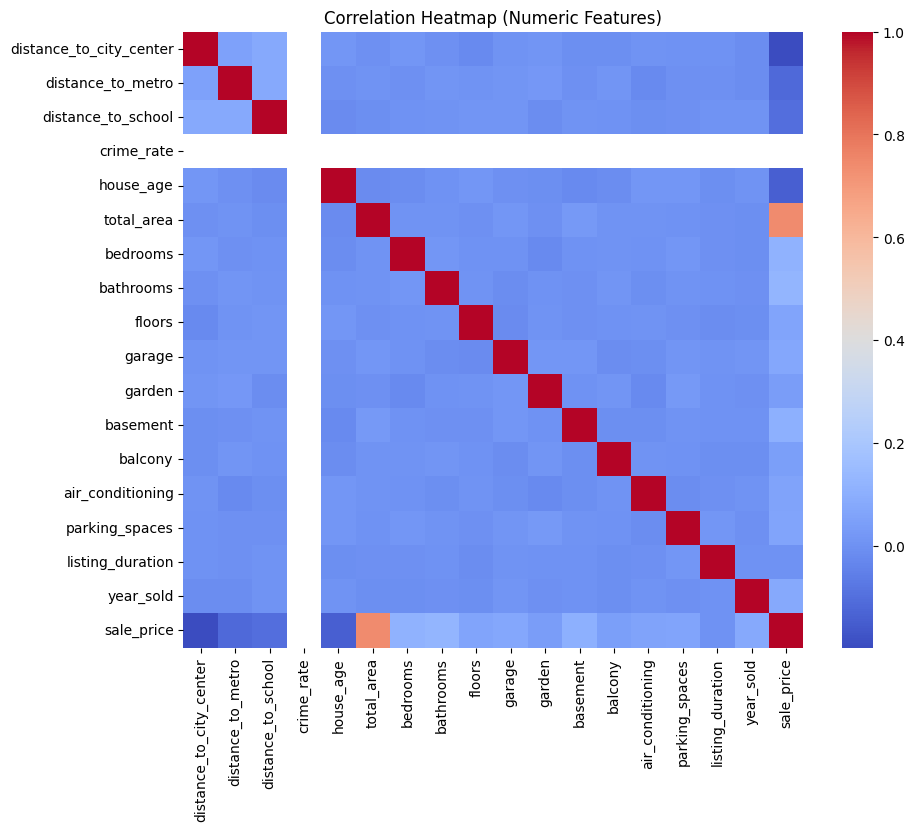

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df[target], kde=True, color='skyblue')
plt.title(f'{target} Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Log transform check
if abs(df[target].skew()) > 1:
    df[target + '_log'] = np.log1p(df[target])
    plt.figure(figsize=(6,4))
    sns.histplot(df[target + '_log'], kde=True, color='orange')
    plt.title(f'Log-Transformed {target} Distribution')
    plt.xlabel('Log Price')
    plt.ylabel('Count')
    plt.show()

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
top_corr = numeric_df.corr()[target].abs().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title(f'Top 10 Correlations with {target}')
plt.xlabel('Correlation (absolute)')
plt.ylabel('Feature')
plt.show()


high_corr_features = top_corr.index[1:5]  # skip target itself
sns.pairplot(df, vars=high_corr_features.tolist() + [target], kind='scatter', diag_kind='kde')
plt.suptitle('Pairplot of Highly Correlated Features', y=1.02)
plt.show()


cat_features_small = [col for col in df.select_dtypes(include=['object','category']).columns if df[col].nunique() <= 10]
for col in cat_features_small:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col, y=target, data=df, palette='Set2')
    plt.title(f'{target} by {col}')
    plt.xticks(rotation=45)
    plt.show()


plt.figure(figsize=(10,8))
numeric_corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(numeric_corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

In [ ]:
if 'area' in df.columns and 'rooms' in df.columns:
    df['area_per_room'] = df['area'] / df['rooms'].replace(0, np.nan)
    df['area_per_room'] = df['area_per_room'].fillna(df['area_per_room'].median())

if 'age' in df.columns:
    df['age_group'] = pd.cut(df['age'], bins=[-1,5,15,30,100], labels=['new','recent','mid','old'])

In [ ]:
y = df[target]
if target + '_log' in df.columns:
    y = df[target + '_log']

X = df.drop(columns=[target] + ([target + '_log'] if target + '_log' in df.columns else []))

num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(include=['object','category']).columns.tolist()

# Outlier removal based on target
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
mask = (y >= (Q1 - 1.5*IQR)) & (y <= (Q3 + 1.5*IQR))
X = X[mask]
y = y[mask]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

Train shape: (6400, 24) | Test shape: (1600, 24)


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [c for c in num_features if c in X_train.columns]),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), [c for c in cat_features if c in X_train.columns])
    ],
    remainder='drop'
)

In [ ]:
pipe = Pipeline([
    ('pre', preprocessor),
    ('reg', LinearRegression())
])

pipe.fit(X_train, y_train)
print("Model training complete")

# Optional: Statsmodels summary
try:
    X_design = preprocessor.fit_transform(X_train)
    X_design = pd.DataFrame(X_design.toarray() if hasattr(X_design, 'toarray') else X_design)
    ols = sm.OLS(y_train.values, sm.add_constant(X_design)).fit()
    print(ols.summary())
except Exception as e:
    print("Statsmodels summary skipped:", e)

Model training complete


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 14 Aug 2025   Prob (F-statistic):                nan
Time:                        09:14:25   Log-Likelihood:             1.6209e+05
No. Observations:                6400   AIC:                        -3.114e+05
Df Residuals:                       0   BIC:                        -2.681e+05
Df Model:                        6399                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        691.1308        inf          0        n

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


MAE: 110.875
MSE: 20356.304
RMSE: 142.676
R²: 0.833


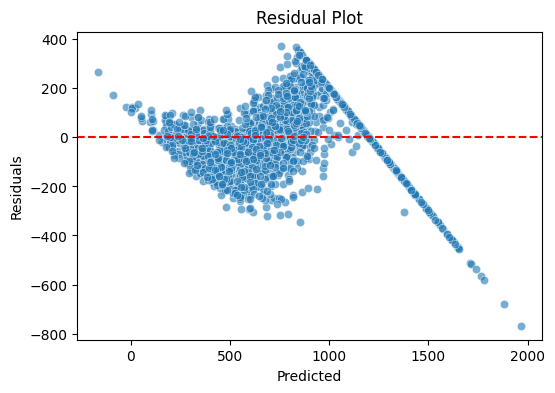

In [ ]:
y_pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()